In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

import warnings
warnings.filterwarnings("ignore")

In [2]:
df0 = pd.read_csv('./datasets/stock-tesla.csv', parse_dates=['Date'])
df0.columns = ['date', 'open', 'high', 'low', 'close', 'vol', 'adj_close']
df = df0.copy()

In [3]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]

In [4]:
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

In [5]:
dataset = new_data.values

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [7]:
X_train, y_train = [], []
for i in range(30, len(dataset)):
    X_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)

1662/1662 - 12s - loss: 0.0032


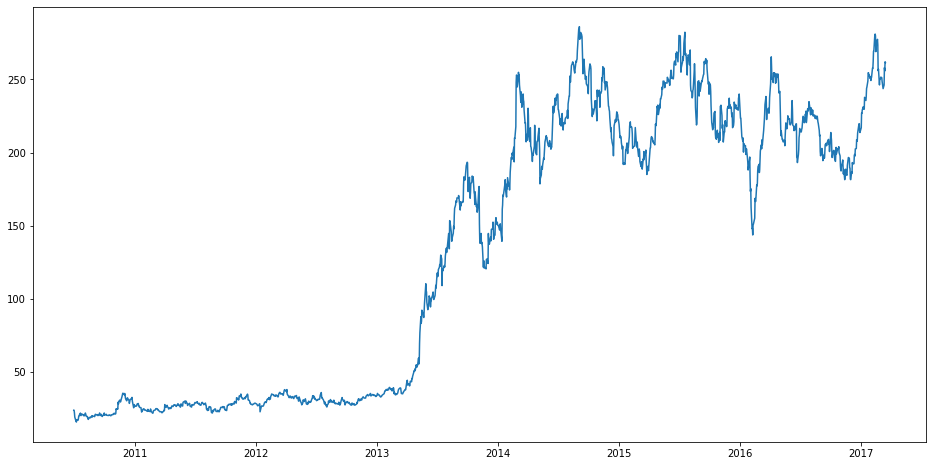

In [9]:
plt.figure(figsize=(16,8))
plt.plot(new_data['close'])

In [10]:
df.tail()

,date,open,high,low,close,vol,adj_close
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,2017-03-17,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


# Testing
Now we make our own empty test set with only date and predictions column

In [11]:
# pd.date_range('18-03-2017', '31-06-2017') # DD-MM-YYYY
pd.date_range(start="2016-07-31", end="2016-09-01", freq="B") # Bussiness day: Mo-Fri

DatetimeIndex(['2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04',
               '2016-08-05', '2016-08-08', '2016-08-09', '2016-08-10',
               '2016-08-11', '2016-08-12', '2016-08-15', '2016-08-16',
               '2016-08-17', '2016-08-18', '2016-08-19', '2016-08-22',
               '2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26',
               '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01'],
              dtype='datetime64[ns]', freq='B')

In [12]:
df_test = pd.DataFrame()
df_test

""


In [13]:
# 2 months prediction
df_test['date'] = pd.date_range(start='2017-03-18', end='2017-05-18', freq='B')
df_test.head()

,date
0,2017-03-20
1,2017-03-21
2,2017-03-22
3,2017-03-23
4,2017-03-24


In [14]:
df_test.index = df_test.date
df_test.drop('date', axis=1, inplace=True)

In [15]:
df_test.head()

""
date
2017-03-20
2017-03-21
2017-03-22
2017-03-23
2017-03-24


In [18]:
# inputs = new_data[len(new_data) - len(validation) - 30:].values
# inputs = inputs.reshape(-1,1)
# inputs  = scaler.transform(inputs)
test = df_test.values
test = test.reshape(-1,1)
test = scaler.transform(test)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.